In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
imgpoints = []

In [5]:
fname = '/home/shankha/MuralPlot/image.jpeg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
ret, corners = cv2.findChessboardCorners(gray, (7,10), None)
print(corners)

[[[ 240.83082581  218.12017822]]

 [[ 221.44171143  217.7833252 ]]

 [[ 202.70310974  217.66456604]]

 [[ 184.15948486  217.74780273]]

 [[ 165.4467926   217.63282776]]

 [[ 146.57366943  217.59669495]]

 [[ 127.62953949  217.54586792]]

 [[ 240.44831848  199.23712158]]

 [[ 221.54748535  198.80273438]]

 [[ 202.62266541  198.58053589]]

 [[ 184.12159729  198.56938171]]

 [[ 165.45799255  198.45619202]]

 [[ 146.56517029  198.46516418]]

 [[ 127.64418793  198.56878662]]

 [[ 240.30967712  179.94058228]]

 [[ 221.36982727  179.77964783]]

 [[ 202.53967285  179.73301697]]

 [[ 183.99719238  179.63200378]]

 [[ 165.48699951  179.67367554]]

 [[ 146.56413269  179.55444336]]

 [[ 127.90908051  179.55471802]]

 [[ 239.87644958  161.19526672]]

 [[ 221.32408142  161.1159668 ]]

 [[ 202.58708191  161.17912292]]

 [[ 183.99758911  161.00749207]]

 [[ 165.44084167  160.97422791]]

 [[ 146.6643219   160.85353088]]

 [[ 128.16291809  160.86141968]]

 [[ 239.81222534  142.50357056]]

 [[ 221.295669

In [9]:
corners2=cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
imgpoints.append(corners)

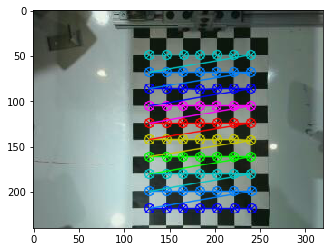

In [10]:
cv2.drawChessboardCorners(img, (7,10), corners2, ret)
plt.imshow(img)

In [ ]:
#th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15, 3)
#plt.imshow(th3, cmap=plt.cm.binary)

In [49]:
rng = [0,6, 63,69]
x_values = [corners[i][0][0] for i in rng]
y_values = [corners[i][0][1] for i in rng]

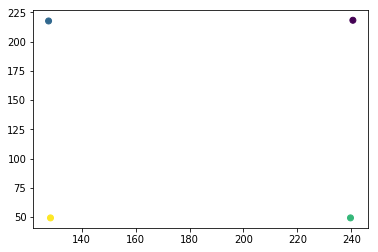

In [50]:
plt.scatter(x_values, y_values, c=range(len(x_values)))

In [51]:
src_pts = np.array([p[0] for p in corners])
dst_pts = []
for x in range(1, 11):
    for y in range(7):
        dst_pts.append([x*20-1, (7-y)*20-1])
dst_pts = np.array(dst_pts)

In [52]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

In [53]:
im_out = cv2.warpPerspective(img, M, (220,160))

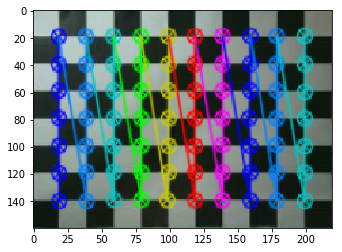

In [54]:
plt.imshow(im_out)

In [56]:
M

array([[  4.89903619e-03,  -1.07843601e+00,   2.53229233e+02],
       [  1.09270836e+00,   5.03453043e-03,  -1.21483029e+02],
       [  2.86136311e-05,   7.78751785e-05,   1.00000000e+00]])